In [1]:
%load_ext autoreload
%autoreload 2

In [47]:
from helpers import run_simulations

In [59]:
bandit_returns = [.001, .004, .0045, 0.006]

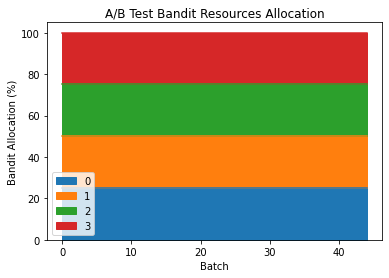

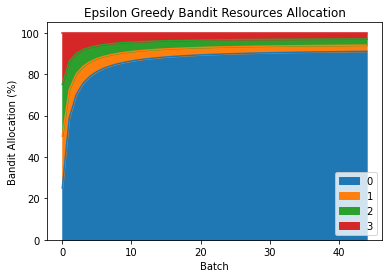

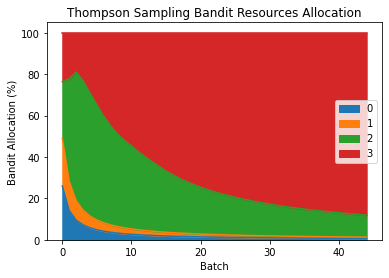

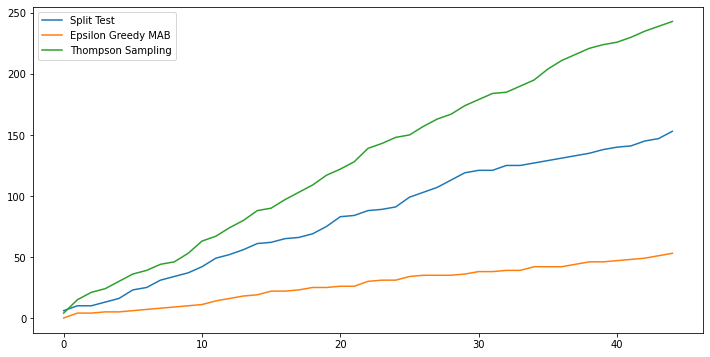

In [62]:
run_simulations(bandits=bandit_returns, simulations=1)